In [7]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd


In [8]:
# Function to display comprehensive univariate analysis for categorical variables
def categorical_univariate_analysis(feature_name, data):
    # Frequency Distribution
    frequency_distribution = data.value_counts()

    # Display results
    print(f"\n------ Univariate Analysis for {feature_name} ------")
    print(f"Frequency Distribution:\n{frequency_distribution}\n")

    # Visualization
    plt.figure(figsize=(8, 5))
    sns.countplot(x=data, order=data.value_counts().index) 
    plt.title(f'{feature_name} Distribution')
    plt.show()

In [9]:
def numerical_univariate_analysis(feature_name, data_series):
    # Descriptive Statistics
    descriptive_stats = data_series.describe()

    # Measures of Central Tendency
    mean_value = data_series.mean()
    median_value = data_series.median()
    mode_value = data_series.mode().iloc[0]

    # Measures of Dispersion
    std_deviation = data_series.std()
    range_value = data_series.max() - data_series.min()
    variance_value = data_series.var()

    # Percentiles and Quartiles
    percentiles = np.percentile(data_series, [25, 50, 75])
    quartiles = {'Q1': percentiles[0], 'Q2': percentiles[1], 'Q3': percentiles[2]}

    # Display results
    print(f"\n------ Univariate Analysis for {feature_name} ------")
    print(f"Descriptive Statistics:\n{descriptive_stats}\n")
    print(f"Measures of Central Tendency:")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Mode: {mode_value}\n")
    print(f"Measures of Dispersion:")
    print(f"Standard Deviation: {std_deviation}")
    print(f"Range: {range_value}")
    print(f"Variance: {variance_value}\n")
    print(f"Percentiles and Quartiles:")
    print(f"Q1 (25th percentile): {percentiles[0]}")
    print(f"Q2 (50th percentile - Median): {percentiles[1]}")
    print(f"Q3 (75th percentile): {percentiles[2]}")
    print(f"Interquartile Range (IQR): {percentiles[2] - percentiles[0]}\n")

    # Visualizations
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(2, 2, 1)
    sns.histplot(data_series)
    plt.title(f'{feature_name} Distribution (Histogram)')

    # KDE Plot
    plt.subplot(2, 2, 2)
    sns.histplot(data_series, kde=True, color='orange', bins=50, alpha=0.7)  # Increase bins and add transparency
    plt.title(f'{feature_name} Distribution with KDE')

    # Box Plot
    plt.subplot(2, 2, 3)
    sns.boxplot(x=data_series, color='green')
    plt.title(f'{feature_name} Box Plot')

    plt.tight_layout()
    plt.show()

In [17]:
# Read the dataset
data = pd.read_csv(r'Assignment 3_attachments\Assignment 3_attachments\your_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           159256 non-null  int64  
 1   AST                  159256 non-null  int64  
 2   serum creatinine     159256 non-null  float64
 3   age                  159256 non-null  int64  
 4   fasting blood sugar  159256 non-null  int64  
 5   eyesight(right)      159256 non-null  float64
 6   height(cm)           159256 non-null  int64  
 7   LDL                  159256 non-null  int64  
 8   dental caries        159256 non-null  int64  
 9   ALT                  159256 non-null  int64  
 10  hearing(right)       159256 non-null  int64  
 11  smoking              159256 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 14.6 MB



------ Univariate Analysis for Hearing (right) ------
Frequency Distribution:
hearing(right)
1    155526
2      3730
Name: count, dtype: int64



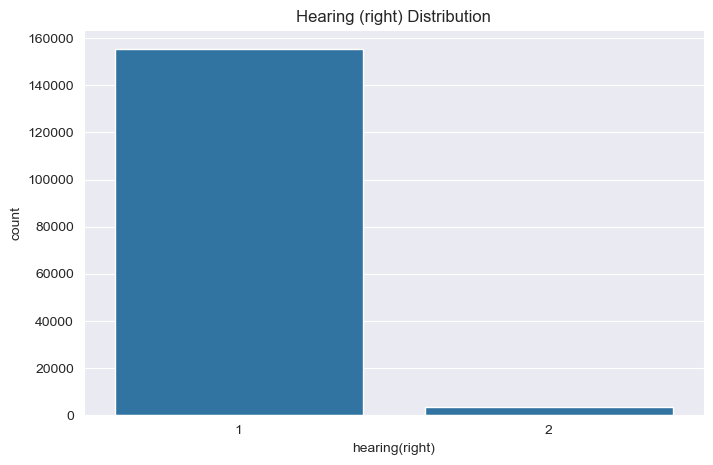

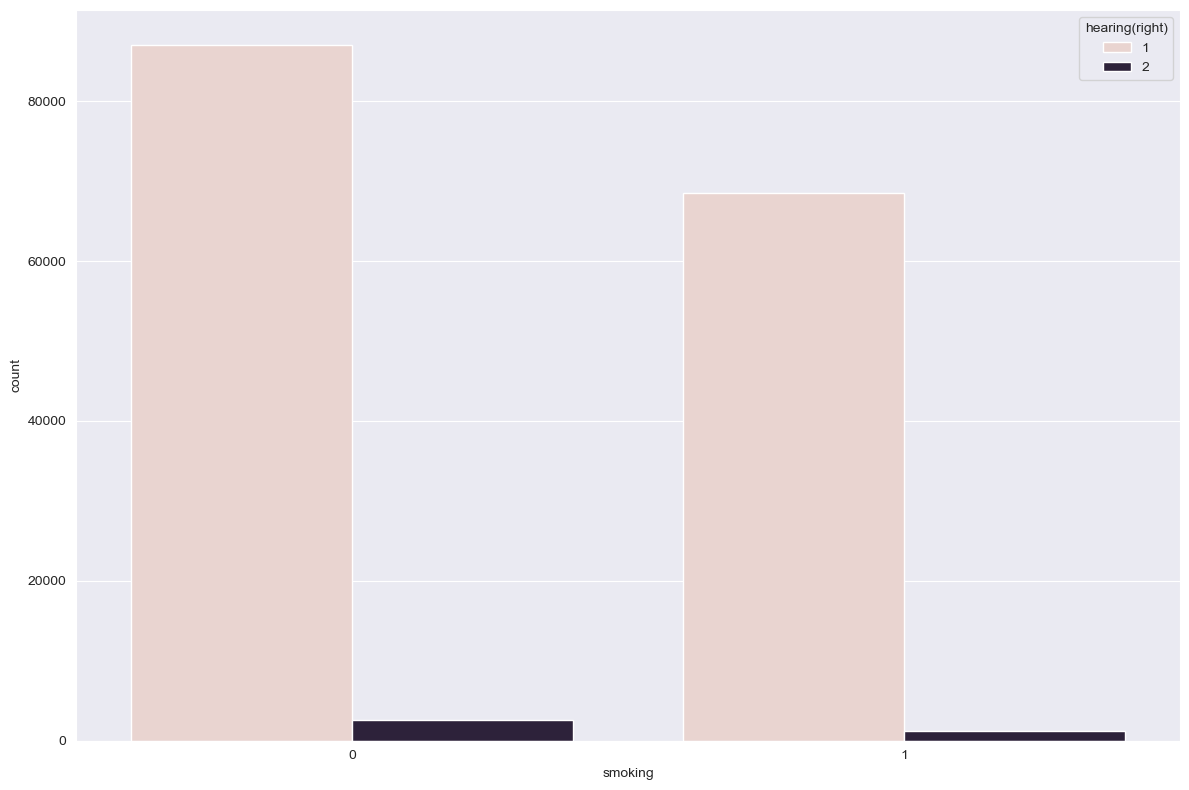

In [19]:
categorical_univariate_analysis('Hearing (right)', data['hearing(right)'])
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='smoking', hue='hearing(right)')
plt.tight_layout()
plt.show()


------ Univariate Analysis for dental caries ------
Frequency Distribution:
dental caries
0    127724
1     31532
Name: count, dtype: int64



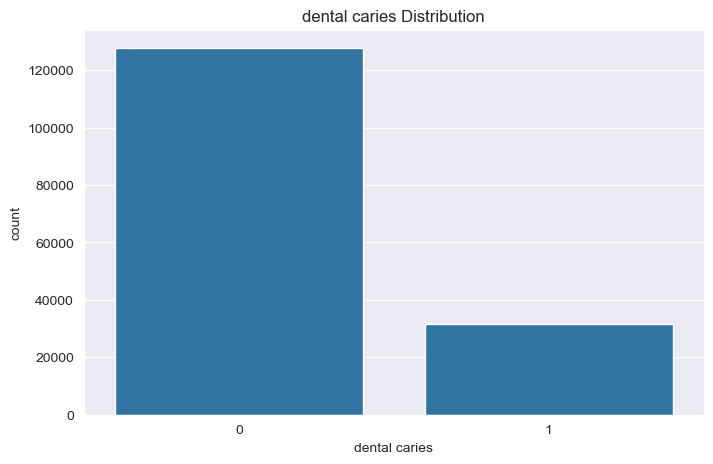

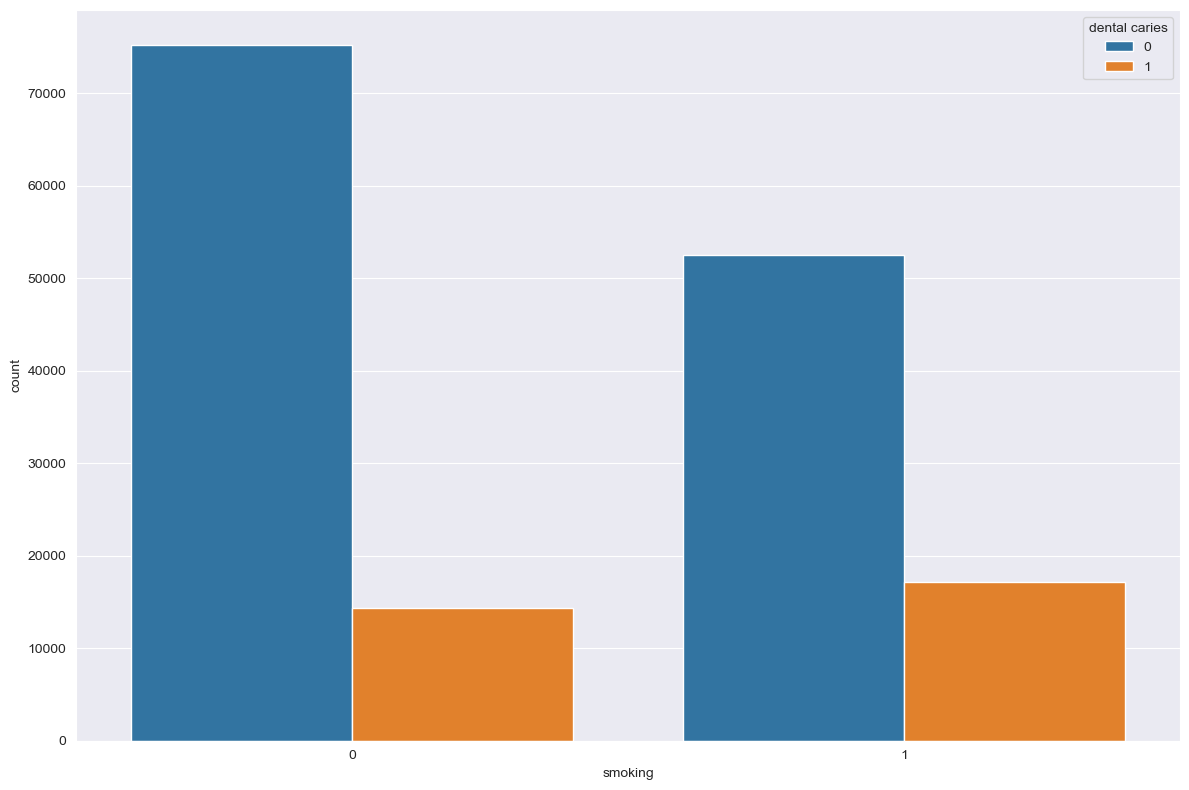

In [23]:
categorical_univariate_analysis('dental caries', data['dental caries'])
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='smoking', hue='dental caries')
plt.tight_layout()
plt.show()


------ Univariate Analysis for ALT ------
Descriptive Statistics:
count    159256.000000
mean         26.550296
std          17.753070
min           1.000000
25%          16.000000
50%          22.000000
75%          32.000000
max        2914.000000
Name: ALT, dtype: float64

Measures of Central Tendency:
Mean: 26.550296378158436
Median: 22.0
Mode: 15

Measures of Dispersion:
Standard Deviation: 17.75307013818495
Range: 2913
Variance: 315.1714993313142

Percentiles and Quartiles:
Q1 (25th percentile): 16.0
Q2 (50th percentile - Median): 22.0
Q3 (75th percentile): 32.0
Interquartile Range (IQR): 16.0



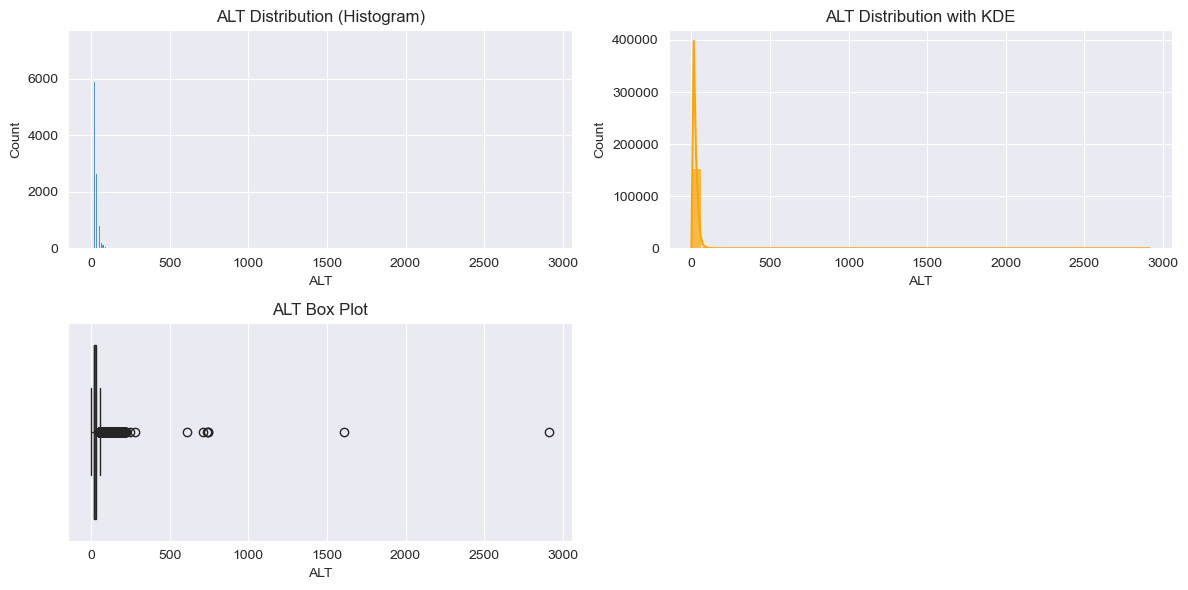

In [20]:
numerical_univariate_analysis('ALT', data['ALT'])


------ Univariate Analysis for AST ------
Descriptive Statistics:
count    159256.000000
mean         25.516853
std           9.464882
min           6.000000
25%          20.000000
50%          24.000000
75%          29.000000
max         778.000000
Name: AST, dtype: float64

Measures of Central Tendency:
Mean: 25.516853368161954
Median: 24.0
Mode: 20

Measures of Dispersion:
Standard Deviation: 9.464882078028898
Range: 772
Variance: 89.58399275099262

Percentiles and Quartiles:
Q1 (25th percentile): 20.0
Q2 (50th percentile - Median): 24.0
Q3 (75th percentile): 29.0
Interquartile Range (IQR): 9.0



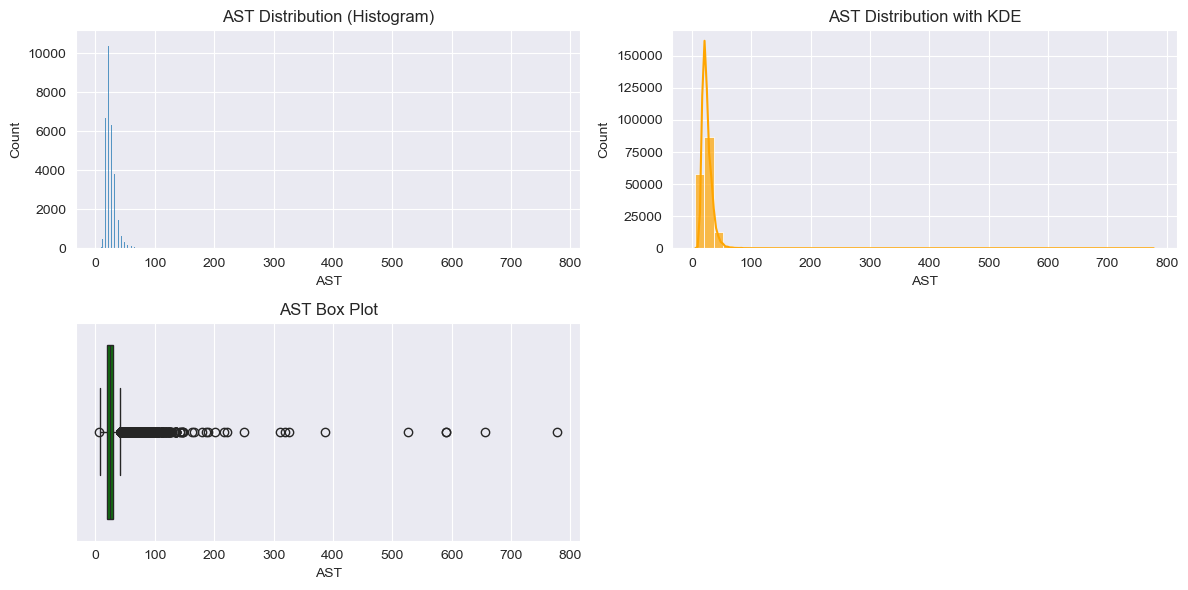

In [21]:
numerical_univariate_analysis('AST', data['AST'])

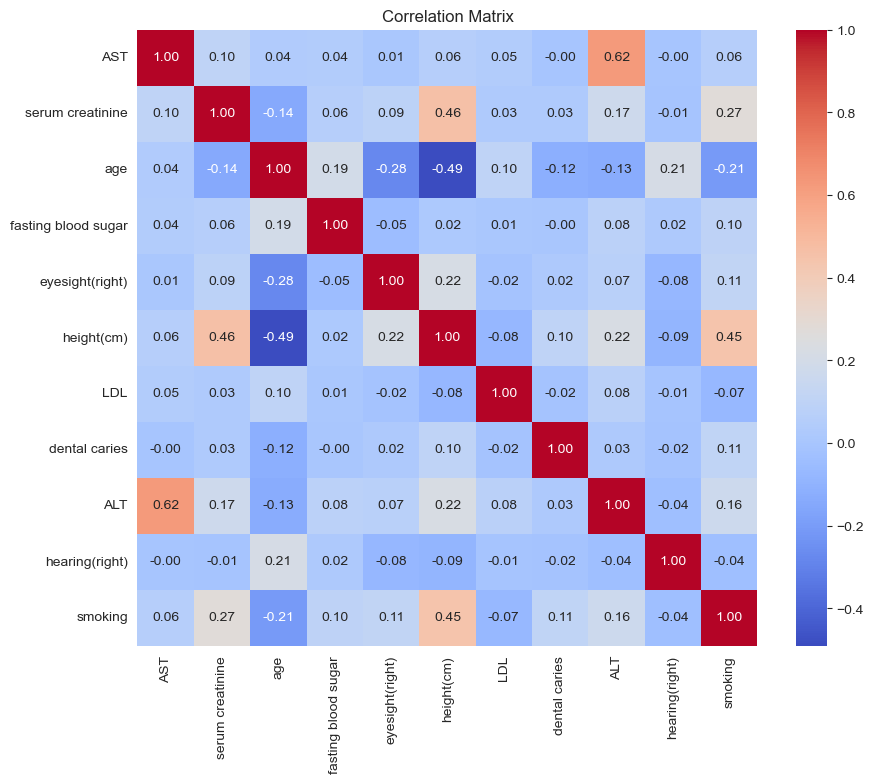

In [22]:
# Corelation Matrix
df = data.drop(data.columns[0], axis=1)
correlation_matrix = df.corr()

# Visualization using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()